# BME 599 Visualization Project
##### Andrea Jacobson, Christopher Louly </br> Due Tue 12/09/2025


This file contains all the code to perform Bloch Simulations and create plots for the Fall 2025 BME599 Visualization Project. All of the actual Bloch Simulation code can be found in `./UM_Blochsim/`, which was written in C for efficiency by the authors of this code before this project was assigned. This is an adaptation of the code found in https://github.com/chlouly/UM_Blochsim so that it may be used by anyone wishing to run this code without cloning and installing UM_Blochsim.


In [1]:
# --- IMPORTS --- #

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['animation.ffmpeg_path'] = '/opt/homebrew/bin/ffmpeg'

from pulsegen import *
from plotting import *

### Setting Up The Simulation

In this section, we will essentially construct an array `B_eff` which holds the effective field strength as a function of time and isochromat position so that we may run Bloch simulations over each isochromat.

In [2]:
# --- DEFINE CONSTANTS --- #

# Sequence Parameters
TE = 80             # Echo Time [ms]
ETL = 8             # Echo Train Length
PW = 2              # Width of Excitation and Refocuser Pulses [ms]
G_dur = 30          # Frequency Encoding Gradient Durration [ms]
G_amp = 0.0005      # Frequency Encoding Gradient Amplitude [T/cm]
start_pad = 5       # Dead time at the beginning of sequence [ms]
dt = 0.01           # Simulation Timestep [ms]

# Multi-isochromat Parameters
num_iso = 50        # Number of Isochromats to Simulate
vox_x = 10**-3      # Voxel Size [cm] (in the x direction)
fenc_dim = 0        # Dimension along which we frequency encode

# Plotting
dsamp = 50          # Downsampling factor for plotting


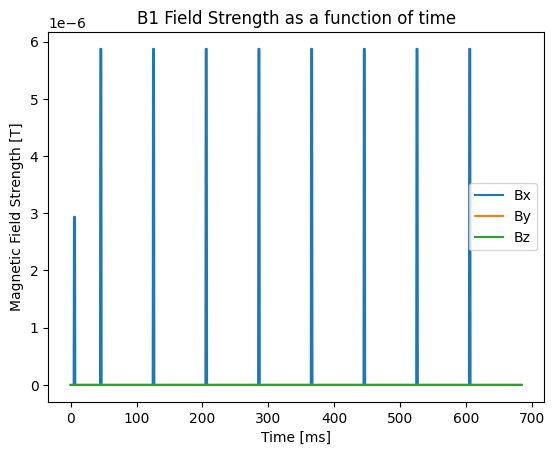

In [3]:
# Create a B1 Array 
B1, T = fse_pulsetrain(PW, ETL, TE, dt, start_pad=start_pad)

# Create a time vector for plotting
ntime = B1.shape[0]
time = np.arange(ntime) * dt

# Plot it as a sanity check
plt.plot(time[::dsamp], B1[::dsamp, 0], label="Bx")
plt.plot(time[::dsamp], B1[::dsamp, 1], label="By")
plt.plot(time[::dsamp], B1[::dsamp, 2], label="Bz")
plt.xlabel("Time [ms]")
plt.ylabel("Magnetic Field Strength [T]")
plt.title("B1 Field Strength as a function of time")
plt.legend()
plt.show()

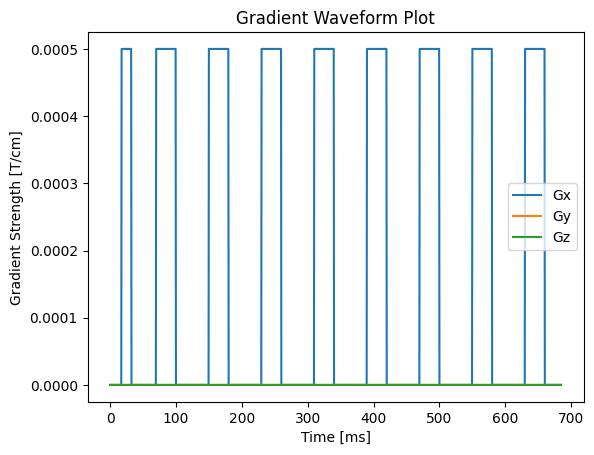

In [4]:
# Create a Gradient Waveform Array
#   We can choose the frequency encoding gradient in any direction, for the purposes 
#   of thissimulation, it doesn't matter, so we choose the x direction.
G, T_G = fse_freq_enc_grad(G_amp, G_dur, ETL, TE, dt, start_pad=start_pad, dim=fenc_dim)

# Make sure the gradient waveform durration is the same as B1 waveform durration
assert(T == T_G)

# Plot G as a sanity check
plt.plot(time[::dsamp], G[::dsamp, 0], label="Gx")
plt.plot(time[::dsamp], G[::dsamp, 1], label="Gy")
plt.plot(time[::dsamp], G[::dsamp, 2], label="Gz")
plt.xlabel("Time [ms]")
plt.ylabel("Gradient Strength [T/cm]")
plt.title("Gradient Waveform Plot")
plt.legend()
plt.show()


In [5]:
# Create Isochrmat positions
iso_pos = np.zeros((3, num_iso))
iso_pos[fenc_dim, :] = np.linspace(-vox_x / 2, vox_x / 2, num_iso)

# Create a 3-array of Effective B fields with the following dimensions:
#       B_eff.shape = (N, D, I)
# Where:
#       N is the number of timepoints to be simulated (same as the variable ntime)
#       D is the number of spatial dimensions (always 3)
#       I is the number of isochromats to be simulated (same as the variable num_iso)
# We use the formula:
#       B_eff = B1 + (G * r)
B_eff = np.tile(B1.reshape(B1.shape + (1,)), (1, 1, num_iso))           # Repeat B1 for each isochromat
B_eff[:, 2, :] += np.sum(G[:, :, None] * iso_pos[None, :, :], axis=1)   # We add the Field of the gradient at each isochromat location


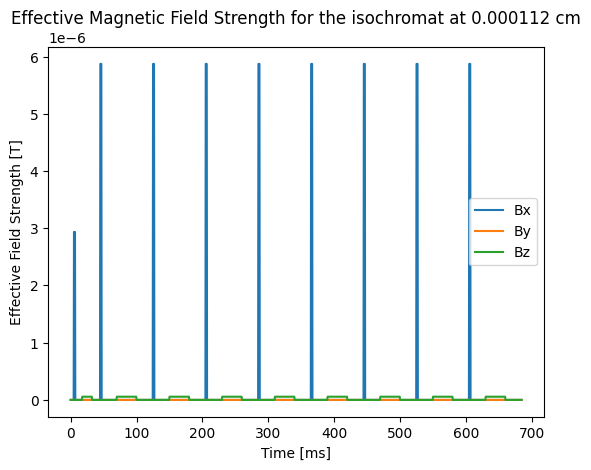

In [8]:
# We can plot the B_eff signal for a particular isochromat as a sanity check. As we change plot_iso_ind, we should see the signal change
plot_iso_ind = 30

plt.plot(time[::dsamp], B_eff[::dsamp, 0, plot_iso_ind], label="Bx")
plt.plot(time[::dsamp], B_eff[::dsamp, 1, plot_iso_ind], label="By")
plt.plot(time[::dsamp], B_eff[::dsamp, 2, plot_iso_ind], label="Bz")
plt.xlabel("Time [ms]")
plt.ylabel("Effective Field Strength [T]")
plt.title(f"Effective Magnetic Field Strength for the isochromat at {iso_pos[fenc_dim, plot_iso_ind]:.3} cm")
plt.legend()
plt.show()

### 2.1 Brain Imaging

### 2.2 Spinal Cord Imaging

### Heart Imaging

Notes: Talk about offresonance in this one around the lungs